# Introduction to Linear Discriminant Analysis (LDA) 

#### In this motebook we introduce the LDA method in scikit-learn, explain its properties and contrast it with PCA.  

In [1]:
from hdf5storage import loadmat, savemat
import numpy as np
from matplotlib import pyplot as plt

#### We are going to load the famous Fisher Iris Data set.  If you take machine learning over in computer science, you will repeatedly analyze these data (according to my grad students).  I will make you look at it once or wice. 

In [2]:
irisdata = loadmat('data/irisdata.mat')


In [3]:
irisdata.keys()

dict_keys(['feature_label', 'measurement', 'species', 'species_id', 'species_label'])

In [4]:
feature_label = irisdata['feature_label']
measurement = irisdata['measurement']
species = irisdata['species']
species_id = irisdata['species_id']
species_label = irisdata['species_label']


### README 

#### `feature_label` is a list of the 4 features 
#### `measurement` is the data (150 x 4)
#### `species` is a list of the species for each of the 150 samples 
#### `species_id` is the same as species but with a numeric label.
#### `species_label` is a list of the 3 species labels.   

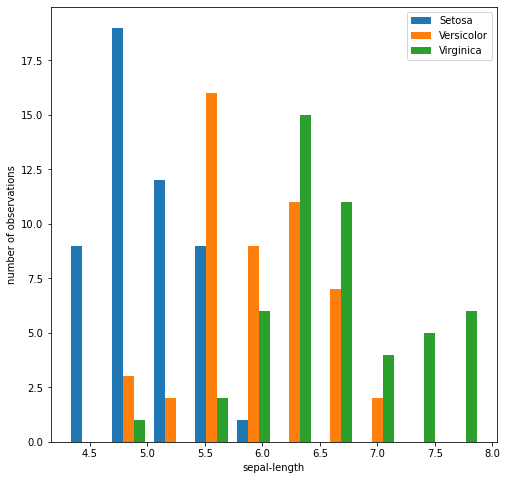

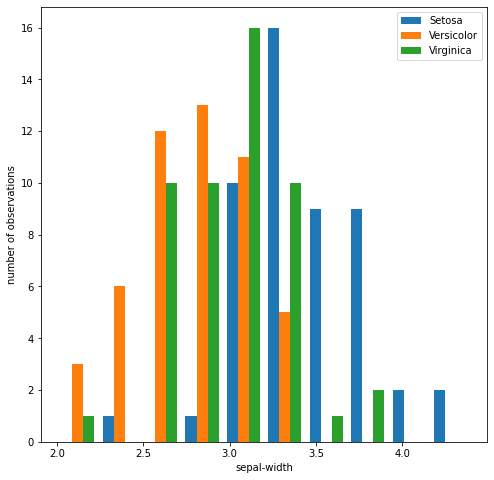

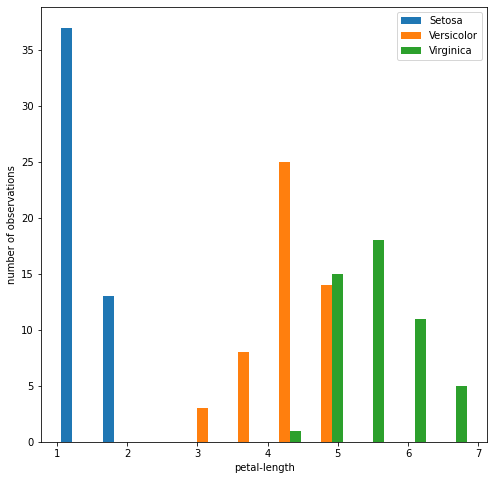

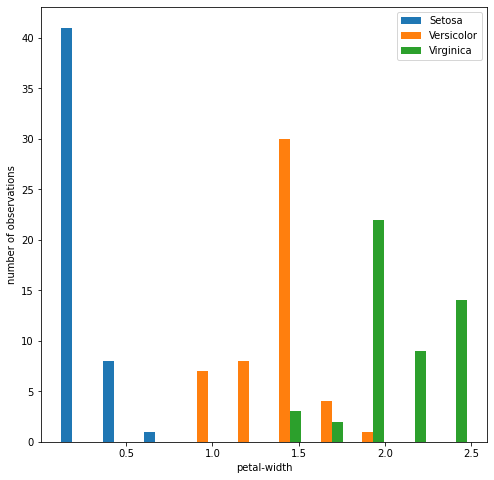

In [5]:
for j in range(4):
    plt.figure(figsize = (8,8))
    plt.hist((measurement[species_id==1,j],measurement[species_id==2,j],measurement[species_id==3,j]))
    plt.legend((species_label[0],species_label[1],species_label[2]))
    plt.xlabel(feature_label[j])
    plt.ylabel('number of observations')
    plt.show()

#### Lets load the LDA module from sklearn.  Im also going to import PCA for comparison

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA 


In [7]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#measurement = sc.fit_transform(measurement)

#### To make the LDA model, the calls are very similar to PCA

In [8]:
iris_lda = LDA(n_components=2) # the highest number of components is the number of classes - 1
iris_lda.fit(measurement, species)
measurement_lda = iris_lda.transform(measurement)
coef_lda = iris_lda.coef_

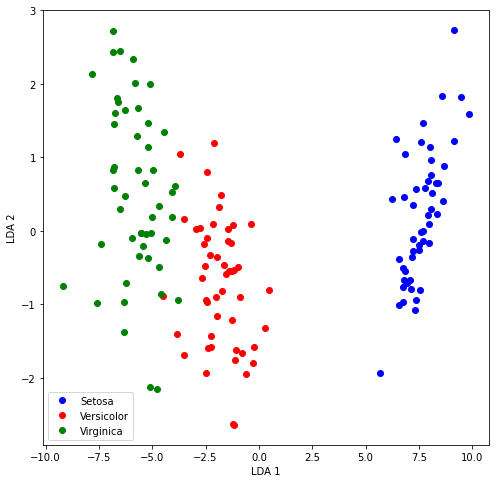

In [9]:
plt.figure(figsize = (8,8))
plt.plot(measurement_lda[species_id == 1,0],measurement_lda[species_id ==1,1],'bo')
plt.plot(measurement_lda[species_id == 2,0],measurement_lda[species_id ==2,1],'ro')
plt.plot(measurement_lda[species_id == 3,0],measurement_lda[species_id ==3,1],'go')
plt.legend((species_label[0],species_label[1],species_label[2]))
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()

In [10]:
print(coef_lda)
print(feature_label)


[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
['sepal-length', 'sepal-width', 'petal-length', 'petal-width']


#### For comparison, lets make a PCA model. 



Text(0, 0.5, 'PCA 2')

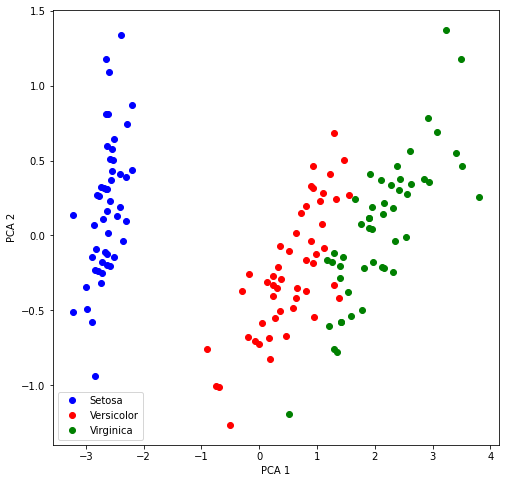

In [11]:
iris_pca = PCA(n_components=3)
iris_pca.fit(measurement)
measurement_pca = iris_pca.transform(measurement)
components_pca = iris_pca.components_
plt.figure(figsize = (8,8))
plt.plot(measurement_pca[species_id == 1,0],measurement_pca[species_id ==1,1],'bo')
plt.plot(measurement_pca[species_id == 2,0],measurement_pca[species_id ==2,1],'ro')
plt.plot(measurement_pca[species_id == 3,0],measurement_pca[species_id ==3,1],'go')
plt.legend((species_label[0],species_label[1],species_label[2]))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#### Let's run LDA again with 1 components and make a prediction  

In [12]:
iris_lda = LDA(n_components=1) # the highest number of components is the number of classes - 1
iris_lda.fit(measurement, species)
measurement_lda = iris_lda.transform(measurement)
coef_lda = iris_lda.coef_

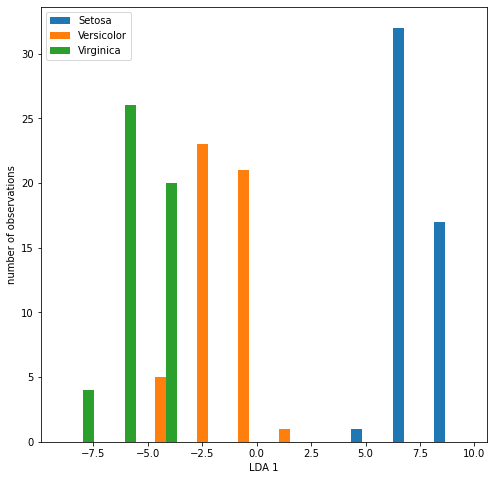

In [13]:
plt.figure(figsize = (8,8))
plt.hist((measurement_lda[species_id==1,0],measurement_lda[species_id==2,0],measurement_lda[species_id==3,0]))
plt.legend((species_label[0],species_label[1],species_label[2]))
plt.xlabel('LDA 1')
plt.ylabel('number of observations')
plt.show()

#### Lets use the LDA model to predict the labels of the measurement  

In [14]:
lda_species = iris_lda.predict(measurement)
diff = (lda_species == species)
ncorrect = sum(diff)
print(ncorrect)
print(ncorrect/150)

147
0.98


#### **Something is logically wrong with what I did here.**  

## CROSS-VALIDATION

#### In order to assess a model, I need to set aside data, and then test the model on data that was not part of the training. 
#### One way to tackle this is called **K-fold cross-validation**

In [15]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits = 5,shuffle = True)

#### The function KFold, shuffles then splits the data into n_splits equal sized compartments. 
#### The model is created n_splits times, each time not using a different part of the data. 
#### The model is then tested on the data that is set aside. 

In [16]:
kf = KFold(n_splits = 5,shuffle = True)
ERRORS = 0
for train_index, test_index in kf.split(measurement):
#    print("TRAIN:", train_index, "TEST:", test_index)
    meas_train, meas_test = measurement[train_index], measurement[test_index]
    Label_train, Label_test = species_id[train_index], species_id[test_index]
    lda = LDA(n_components=1)
    meas_model = lda.fit_transform(meas_train, Label_train)
    CLASS = lda.predict(meas_test)
    TEST = Label_test == CLASS
    ERRORS = ERRORS + sum(~TEST)
ERRORRATE = ERRORS/len(species_id)
meas_model = lda.fit_transform(measurement,species_id)
COEF= lda.coef_  
print(ERRORRATE)
print(COEF)

0.02666666666666667
[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]
